# **Problem Statement**

Farmers who grow potatos are facing lot a of economical losses every year because of various diseases that can happen to a potato plant. There are two common diseases known as Early Blight and Late Blight. If farmers can detect these diseases early and apply approriate treatment then it can save lot of waste and prevent economical losses.

You have decided to build a mobile application that uses deep learning  and CCN to predict wheather it is healty or got diseses.

In [29]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [30]:
IMAGE_SIZE = 256
EPOCHS =50

In [31]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/Potato Disease Classification/PlantVillage',
                                                    shuffle=True,
                                                    image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                    batch_size=32)

Found 2152 files belonging to 3 classes.


In [32]:
class_name=dataset.class_names

In [33]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [34]:
len(dataset)     # 68*32 = 2176

68

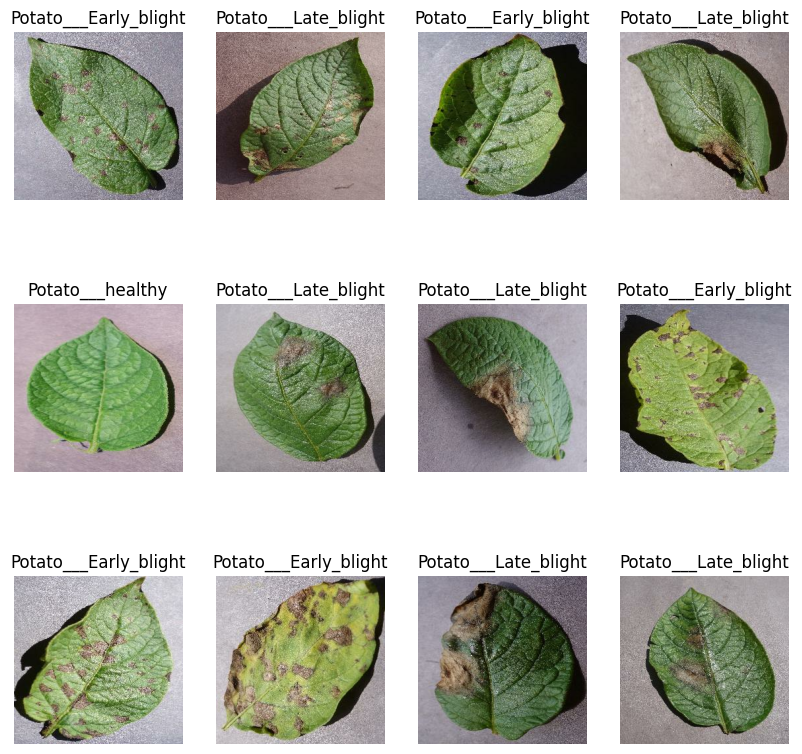

In [35]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype(int))
    plt.title(class_name[label_batch[i]])
    plt.axis("off")

In [36]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [37]:
train_size =0.8
len(dataset)*train_size

54.400000000000006

In [38]:
Train_ds = dataset.take(54)

In [39]:
Test_ds = dataset.skip(54)
len(Test_ds)

14

In [40]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [41]:

val_ds = Test_ds.take(6)
len(val_ds)

6

In [42]:
Test_ds = Test_ds.skip(6)
len(Test_ds)

8

In [43]:
def get_dataset_partions_tf(ds,train_split=0.8,val_split=0.1, test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size= len(ds)

  if shuffle:
   ds=ds.shuffle(shuffle_size,seed=12)
  train_size = int(ds_size*train_split)
  val_size = int(ds_size*val_split)

  train_ds = ds.take(train_size)
  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)


  return train_ds, val_ds, test_ds

In [44]:
train_ds, val_ds, test_ds = get_dataset_partions_tf(dataset)

In [45]:
len(train_ds)

54

In [46]:
len(val_ds)

6

In [47]:
len(test_ds)

8

In [48]:
# layers for resize and rescale
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255)
])

In [49]:
# layers for data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])



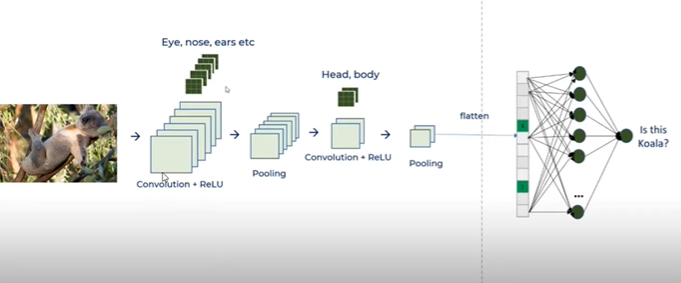

## Model Building:


In [50]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,IMAGE_SIZE,IMAGE_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(3, activation='softmax'),
])

model.build(input_shape=(32,IMAGE_SIZE,IMAGE_SIZE,3))

In [51]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False) ,
              metrics=['accuracy'])

In [53]:
history = model.fit(train_ds,
                     epochs=EPOCHS,
                     verbose=1,
                     batch_size=32,
                     validation_data=val_ds)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 157ms/step - accuracy: 0.4789 - loss: 0.9324 - val_accuracy: 0.5781 - val_loss: 0.8733
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 19s 255ms/step - accuracy: 0.6699 - loss: 0.7571 - val_accuracy: 0.6250 - val_loss: 0.8776
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 162ms/step - accuracy: 0.7981 - loss: 0.5112 - val_accuracy: 0.7917 - val_loss: 0.5272
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.8621 - loss: 0.3600 - val_accuracy: 0.8854 - val_loss: 0.2869
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.8956 - loss: 0.2637 - val_accuracy: 0.9323 - val_loss: 0.1938
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 169ms/step - accuracy: 0.9104 - loss: 0.2486 - val_accuracy: 0.9271 - val_loss: 0.2231
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 165ms/step - accuracy: 0.9273 - loss: 0.2000 - val_accuracy: 0.9375 - val_loss: 0.1479
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - accuracy: 0.9275 - loss: 0.1751 - val_accu

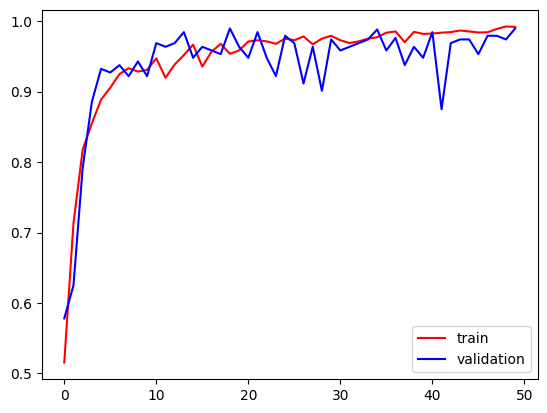

In [54]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [55]:
import numpy as np

first image to predict
actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
predicted label: Potato___Early_blight


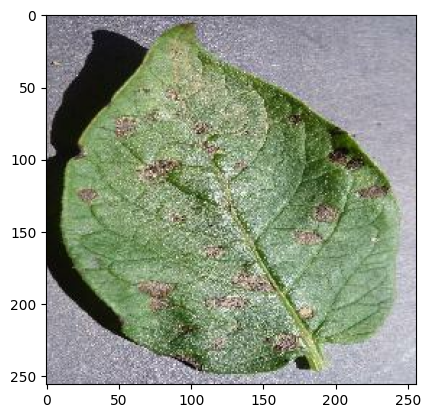

In [56]:
for image_batch,label_batch in test_ds.take(1):
  first_iamge = image_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print('first image to predict')
  plt.imshow(first_iamge)
  print('actual label:',class_name[first_label])

  batch_prediction = model.predict(image_batch)
  print('predicted label:',class_name[np.argmax(batch_prediction[0])])




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


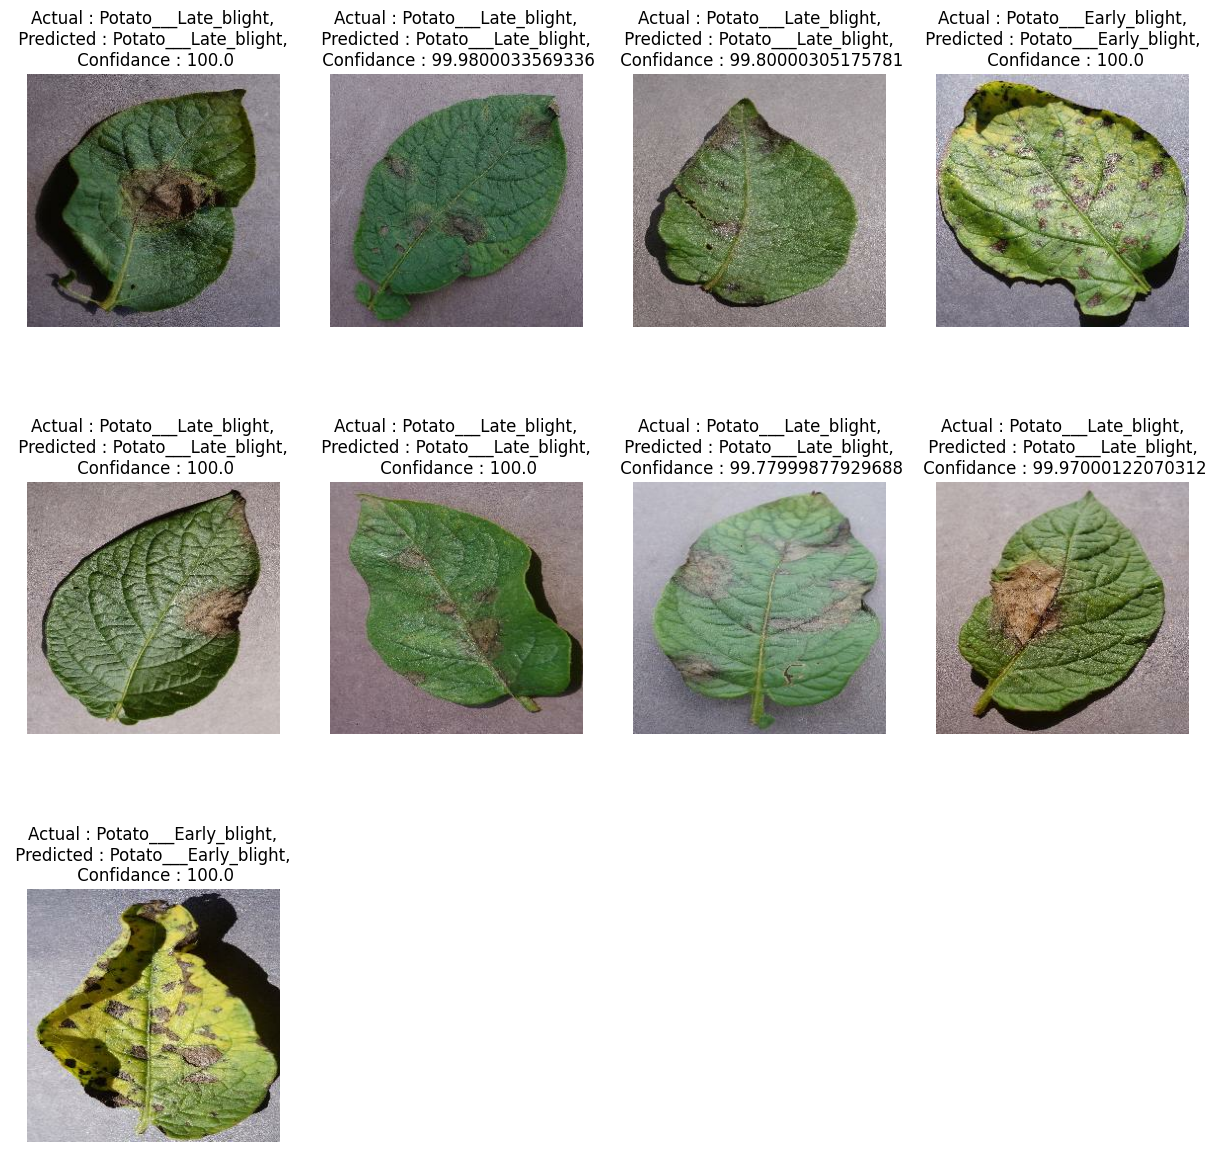

In [57]:
plt.figure(figsize=(15,15))
for image,label in test_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.axis('off')
    batch_predictions = model.predict(image)
    actual_class =class_name[label[i]]
    predicted_class = class_name[np.argmax(batch_predictions[i])]
    confidance = round(100*(np.max(batch_predictions[i])),2)

    plt.title(f'Actual : {actual_class},\n Predicted : {predicted_class}, \n Confidance : {confidance}' )


In [59]:
model_version = 'potato_disease'
model.save(f"{model_version}.keras")